# Cleaning of Cases Data
Source: The Violence Project

## Load data

In [5]:
import pandas as pd
from pathlib import Path

# Ignnore warning
import warnings
warnings.simplefilter(action='ignore')

# Local modules
from codes import code_column_names
from data_exploration import dataset_info, find_keyword_in_list

In [6]:
csv = Path('raw_data/full_database.csv')
cases_df = pd.read_csv(csv)

In [7]:
# Find column names with non-conventional characters
search_terms = ['\xa0']

problems = []

for item in search_terms:
    for c in cases_df.columns:
        if item in c:
            problems.append(c)

# Print problematic columns
print(problems)

# Remove problematic characters from column names
problems_fixed = [p.replace('\xa0','') for p in problems]
print(problems_fixed)

# Rename problematic columns
for i in range(len(problems)):
    cases_df = cases_df.rename(columns={problems[i]: problems_fixed[i]})


['Employment Type\xa0', 'Known Prejudices\xa0', 'Motive: Interpersonal Conflict\xa0', 'Motive: Other\xa0', 'Social Media Use\xa0', 'Leakage\xa0', 'Leakage Who\xa0', 'Leakage Specific/Nonspecific\xa0']
['Employment Type', 'Known Prejudices', 'Motive: Interpersonal Conflict', 'Motive: Other', 'Social Media Use', 'Leakage', 'Leakage Who', 'Leakage Specific/Nonspecific']


## Drop columns that are too specific

In [8]:
keyword_1 = 'Specify'
keyword_2 = 'Specified'
keyword_3 = 'Expanded'
keyword_4 = 'Medication Specified'

detailed_column = find_keyword_in_list(keyword_1, cases_df.columns)
detailed_column += find_keyword_in_list(keyword_2, cases_df.columns)
detailed_column += find_keyword_in_list(keyword_3, cases_df.columns)
detailed_column += find_keyword_in_list(keyword_4, cases_df.columns)

print(f"The following columns will be dropped:\n{detailed_column}")

# Drop all columns containing detailed information
cases_df = cases_df.drop(columns=detailed_column)

The following columns will be dropped:
['Specify Armed Person', 'Health Issues - Specify', 'Specify Relationship to Other Shooting(s)', 'Specify Pop Culture Connection', 'Specify Other Weapons or Gear', 'School Performance Specified', 'Community Involvement Specified', 'Domestic Abuse Specified', 'Psychiatric Medication Specified', 'Signs of Crisis Expanded', 'Psychiatric Medication Specified']


## Get all column names

In [9]:
for c in cases_df.columns:
    print(c)

Case #
Shooter Last Name
Shooter First Name
Full Date
Day of Week
Day
Month
Year
Street Number
Street Name
City
State
County
Zip Code
Latitude
Longitude
State Code
Region
Urban/Suburban/Rural
Metro/Micro Statistical Area Type
Location
Insider or Outsider
Workplace Shooting
Multiple Locations
Other Location
Armed Person on Scene
Number Killed
Number Injured
Family Member Victim
Romantic Partner Victim
Kidnapping or Hostage Situation
Age
Gender
Race
Height
Weight
Immigrant
Sexual Orientation
Religion
Education
School Performance
Birth Order
Number of Siblings
Older Siblings
Younger Siblings
Relationship Status
Children
Employment Status
Employment Type
Military Service
Military Branch
Community Involvement
Known to Police or FBI
Criminal Record
Part I Crimes
Part II Crimes
Highest Level of Justice System Involvement
History of Physical Altercations
History of Animal Abuse
History of Domestic Abuse
History of Sexual Offenses
Gang Affiliation
Terror Group Affiliation
Known Hate Group or Ch

### Seperate columns for each dataset: cases and shooter

In [10]:
id_columns = ['Case #', 'Shooter Last Name', 'Shooter First Name']

location_fields = ['Street Number',
                    'Street Name',
                    'City',
                    'State',
                    'County',
                    'Zip Code',
                    'Latitude',
                    'Longitude',
                    'State Code',
                    'Region',
                    'Urban/Suburban/Rural',
                    'Metro/Micro Statistical Area Type',
                    'Location',
                    'Insider or Outsider',
                    'Workplace Shooting',
                    'Multiple Locations',
                    'Other Location',
                    'Armed Person on Scene']

date_fields = ['Full Date','Day of Week','Day','Month','Year']

case_only_columns = ['Number Killed',
                    'Number Injured',
                    'Family Member Victim',
                    'Romantic Partner Victim',
                    'Kidnapping or Hostage Situation',
                    'Motive: Racism/Xenophobia',
                    'Motive: Religious Hate',
                    'Motive: Misogyny',
                    'Motive: Homophobia',
                    'Motive: Employment Issue',
                    'Motive: Economic Issue',
                    'Motive: Legal Issue',
                    'Motive: Relationship Issue',
                    'Motive: Interpersonal Conflict',
                    'Motive: Fame-Seeking',
                    'Motive: Other',
                    'Motive: Unknown',
                    'Role of Psychosis in the Shooting',
                    'Social Media Use',
                    'Leakage',
                    'Leakage How',
                    'Leakage Who',
                    'Leakage Specific/Nonspecific',
                    'Interest in Past Mass Violence',
                    'Relationship with Other Shooting(s)',
                    'Legacy Token',
                    'Pop Culture Connection',
                    'Planning',
                    'Performance',
                    'Total Firearms Brought to the Scene',
                    'Other Weapons or Gear',
                    'On-Scene Outcome',
                    'Who Killed Shooter On Scene',
                    'Attempt to Flee',
                    'Insanity Defense',
                    'Criminal Sentence']

## Create case DataFrame based on case-only fields

In [11]:
# Create case-only DataFrame
clean_cases_df = cases_df[id_columns+date_fields+location_fields+case_only_columns]

In [12]:
clean_cases_df.head(3)

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Street Number,Street Name,...,Pop Culture Connection,Planning,Performance,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
0,1,Whitman,Charles,8/1/1966,Monday,1,8,1966,110,Inner Campus Dr,...,0,1.0,0,7,1,1,2,0,2,0.0
1,2,Smith,Robert,11/12/1966,Saturday,12,11,1966,Rose-Mar College of Beauty,N Rose,...,0,1.0,1,1,1,2,0,0,1,1.0
2,3,Held,Leo,10/23/1967,Monday,23,10,1967,599,S Highland St,...,0,0.0,0,2,1,1,2,0,2,0.0


## Check datetime data

In [13]:
# Check that all years are valid
clean_cases_df['Year'].value_counts().sort_index().index

Int64Index([1966, 1967, 1968, 1969, 1970, 1972, 1973, 1975, 1976, 1977, 1978,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
           dtype='int64')

In [14]:
# Check that all months are valid
clean_cases_df['Month'].value_counts().sort_index().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [15]:
# Check that all days are valid
clean_cases_df['Day'].value_counts().sort_index().index

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '19-20', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '4', '5', '6', '7', '8', '9'],
      dtype='object')

In [16]:
# Check event with double date
clean_cases_df.loc[clean_cases_df['Day']=='19-20',:]

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Street Number,Street Name,...,Pop Culture Connection,Planning,Performance,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
186,189,Aldrich,Anderson,11/19-20/2022,Saturday/Sunday,19-20,11,2022,3430,N Academy Blvd,...,0,0.0,0,2,1,2,0,0,3,NaN


In [17]:
# Case # 189 refers to the Club Q shooting in Colorado Srping. The shooting started at 11:56 PM on 19 Nov 2022 and lasted around 6 minutes (ended at 12:02 AM)
# To simplify the data analysis, we keep only the start date as the date to refer to this case
clean_cases_df.loc[clean_cases_df['Day']=='19-20','Full Date'] = '11/19/2022'
clean_cases_df.loc[clean_cases_df['Day']=='19-20','Day of Week'] = 'Saturday'
clean_cases_df.loc[clean_cases_df['Day']=='19-20','Day'] = '19'

clean_cases_df.loc[clean_cases_df['Case #']==189,:]

,Case #,Shooter Last Name,Shooter First Name,Full Date,Day of Week,Day,Month,Year,Street Number,Street Name,...,Pop Culture Connection,Planning,Performance,Total Firearms Brought to the Scene,Other Weapons or Gear,On-Scene Outcome,Who Killed Shooter On Scene,Attempt to Flee,Insanity Defense,Criminal Sentence
186,189,Aldrich,Anderson,11/19/2022,Saturday,19,11,2022,3430,N Academy Blvd,...,0,0.0,0,2,1,2,0,0,3,NaN


In [18]:
# Check that all days are valid
clean_cases_df['Day'].value_counts().sort_index().index

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30',
       '31', '4', '5', '6', '7', '8', '9'],
      dtype='object')

In [19]:
# Check that all days of the week are valid
clean_cases_df['Day of Week'].value_counts().sort_index().index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [20]:
# Convert Date string to datetime
clean_cases_df['Full Date'] = pd.to_datetime(clean_cases_df['Full Date'], format='%m/%d/%Y')

### Check the validity of the dates by plotting the total number of cases over the years

In [21]:
# Count the number of cases per year
shooting_per_year = pd.DataFrame(clean_cases_df.groupby('Full Date').count()['Case #'])

# Calculate the cummulative number of cases over the year
shooting_per_year['Date'] = shooting_per_year.index
shooting_per_year['Total shootings'] = 0

# Set the index as the line number
shooting_per_year = shooting_per_year.set_index(pd.Index(list(range(len(shooting_per_year)))))

# Calculate the cummulative number of shootings
for index, row in shooting_per_year.iterrows():
    if index == 0:
        shooting_per_year.loc[index, 'Total shootings'] = shooting_per_year.loc[index, 'Case #']
    else:
        shooting_per_year.loc[index, 'Total shootings'] = shooting_per_year.loc[index, 'Case #'] + shooting_per_year.loc[index-1, 'Total shootings']

# Display the DataFrame
display(shooting_per_year)

,Case #,Date,Total shootings
0,1,1966-08-01,1
1,1,1966-11-12,2
2,1,1967-10-23,3
3,1,1968-03-16,4
4,1,1969-04-05,5
...,...,...,...
184,1,2023-01-21,189
185,1,2023-01-23,190
186,1,2023-03-27,191
187,1,2023-04-10,192


<Axes: title={'center': 'Total Number of Shootings'}, xlabel='Date'>

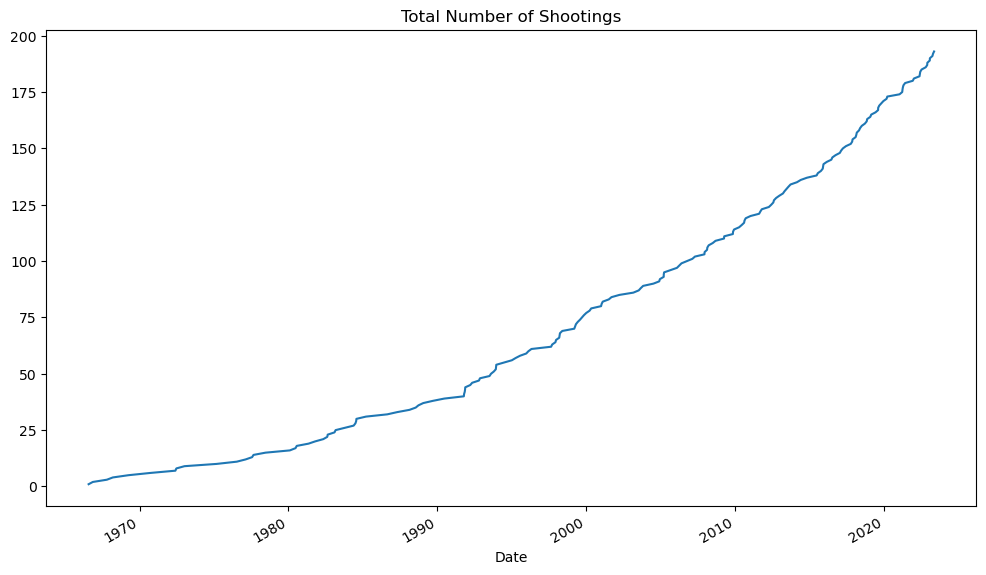

In [22]:
# Plot the cummulative number of shootings
shooting_per_year.plot.line(x='Date',y='Total shootings', figsize=(12,7), title='Total Number of Shootings', legend=False)

In [23]:
# Check whether the datetime data contains any NaN
data_is_na = clean_cases_df[date_fields].isna()
data_is_na.value_counts()

Full Date  Day of Week  Day    Month  Year 
False      False        False  False  False    193
dtype: int64

## Check location data
The location data are checked for completeness. The dataset is considered complete since the following fields do not have missing ('NaN') data:
- 'State'
- 'County'
- 'Zip Code'
- 'Latitude'
- 'Longitude'

In [24]:
location_info_df = dataset_info(clean_cases_df[location_fields])
location_info_df

,columns,dtypes,elements,missing,unique
0,Street Number,object,179,14,165
1,Street Name,object,187,6,178
2,City,object,193,0,173
3,State,object,193,0,42
4,County,object,193,0,141
5,Zip Code,int64,193,0,186
6,Latitude,float64,193,0,190
7,Longitude,float64,193,0,190
8,State Code,int64,193,0,42
9,Region,int64,193,0,4


### Top 10 states for mass shootings

In [25]:
Top10_states = pd.DataFrame(clean_cases_df.groupby('State').count()['Case #'].sort_values(ascending=False)).head(10)
Top10_states

,Case #
State,
CA,30
TX,21
FL,13
NY,10
CO,9
PA,8
WA,8
NC,7
IL,7


In [26]:
clean_cases_df.dtypes

Case #                                  int64
Shooter Last Name                      object
Shooter First Name                     object
Full Date                      datetime64[ns]
Day of Week                            object
                                    ...      
On-Scene Outcome                        int64
Who Killed Shooter On Scene             int64
Attempt to Flee                         int64
Insanity Defense                        int64
Criminal Sentence                     float64
Length: 62, dtype: object

## Looking for NaN in other columns



In [27]:
missing_date = dataset_info(clean_cases_df[case_only_columns]).sort_values('missing',ascending=False)
missing_date

,columns,dtypes,elements,missing,unique
21,Leakage Who,object,88,105,22
20,Leakage How,object,89,104,17
22,Leakage Specific/Nonspecific,object,91,102,7
35,Criminal Sentence,float64,184,9,6
10,Motive: Economic Issue,float64,192,1,2
23,Interest in Past Mass Violence,float64,192,1,2
15,Motive: Other,float64,192,1,3
14,Motive: Fame-Seeking,float64,192,1,2
12,Motive: Relationship Issue,float64,192,1,2
11,Motive: Legal Issue,float64,192,1,2


In [28]:
print('Columns with missing data:\n---')
cols_miss_data = missing_date.loc[missing_date['missing']>0,:]['columns'].tolist()
for c in cols_miss_data:
    print(c)

Columns with missing data:
---
Leakage Who
Leakage How
Leakage Specific/Nonspecific
Criminal Sentence
Motive: Economic Issue
Interest in Past Mass Violence
Motive: Other
Motive: Fame-Seeking
Motive: Relationship Issue
Motive: Legal Issue
Motive: Interpersonal Conflict
Motive: Employment Issue
Motive: Homophobia
Motive: Misogyny
Motive: Religious Hate
Motive: Racism/Xenophobia
Kidnapping or Hostage Situation
Planning


In [29]:
# Replace NaN by "Unknown")
value = 'Unknown'
replace_by_value = cols_miss_data[0:3]
print(replace_by_value)

for c in replace_by_value:
    clean_cases_df = clean_cases_df.fillna({c: value})

['Leakage Who', 'Leakage How', 'Leakage Specific/Nonspecific']


In [30]:
# Replace NaN by -1 (= "unknown")
value = -1
replace_by_value = [cols_miss_data[3]]
print(replace_by_value)

for c in replace_by_value:
    clean_cases_df = clean_cases_df.fillna({c: value})

['Criminal Sentence']


In [31]:
# Replace NaN by 0 (= "no evidence")
replace_by_zero = cols_miss_data[4:]
print(replace_by_zero)

for c in replace_by_zero:
    clean_cases_df = clean_cases_df.fillna({c: 0})

['Motive: Economic Issue', 'Interest in Past Mass Violence', 'Motive: Other', 'Motive: Fame-Seeking', 'Motive: Relationship Issue', 'Motive: Legal Issue', 'Motive: Interpersonal Conflict', 'Motive: Employment Issue', 'Motive: Homophobia', 'Motive: Misogyny', 'Motive: Religious Hate', 'Motive: Racism/Xenophobia', 'Kidnapping or Hostage Situation', 'Planning']


In [32]:
dataset_info(clean_cases_df[case_only_columns]).sort_values('missing',ascending=False)

,columns,dtypes,elements,missing,unique
0,Number Killed,int64,193,0,20
1,Number Injured,int64,193,0,34
20,Leakage How,object,193,0,18
21,Leakage Who,object,193,0,23
22,Leakage Specific/Nonspecific,object,193,0,8
23,Interest in Past Mass Violence,float64,193,0,2
24,Relationship with Other Shooting(s),int64,193,0,2
25,Legacy Token,int64,193,0,2
26,Pop Culture Connection,int64,193,0,3
27,Planning,float64,193,0,2


## Save DataFrame as a CSV file

In [33]:
csv_out = Path('clean_data/clean_cases.csv')
clean_cases_df.to_csv(csv_out, index=False)